In [40]:
import pandas as pd
import numpy as np
heart=pd.read_csv("heart_disease.csv")
print(heart.head())

   Unnamed: 0  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
0           1   63    1   1       145   233    1        2      150      0   
1           2   67    1   4       160   286    0        2      108      1   
2           3   67    1   4       120   229    0        2      129      1   
3           4   37    1   3       130   250    0        0      187      0   
4           5   41    0   2       130   204    0        2      172      0   

   oldpeak  slope   ca thal  present  
0      2.3      3  0.0  6.0        0  
1      1.5      2  3.0  3.0        1  
2      2.6      2  2.0  7.0        1  
3      3.5      3  0.0  3.0        0  
4      1.4      1  0.0  3.0        0  


In [2]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [15]:
heart.isnull().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
present       0
dtype: int64

In [16]:
heart['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [17]:
heart['thal'].value_counts()

3.0    164
7.0    115
6.0     18
?        2
Name: thal, dtype: int64

In [18]:
heart = heart[heart['ca'] != '?']
heart['ca'] = heart['ca'].astype('float')
heart['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [19]:
heart = heart.replace('?',pd.NA) # Convert '?' to NA values
heart.dropna(inplace=True) # Drop rows with NA values

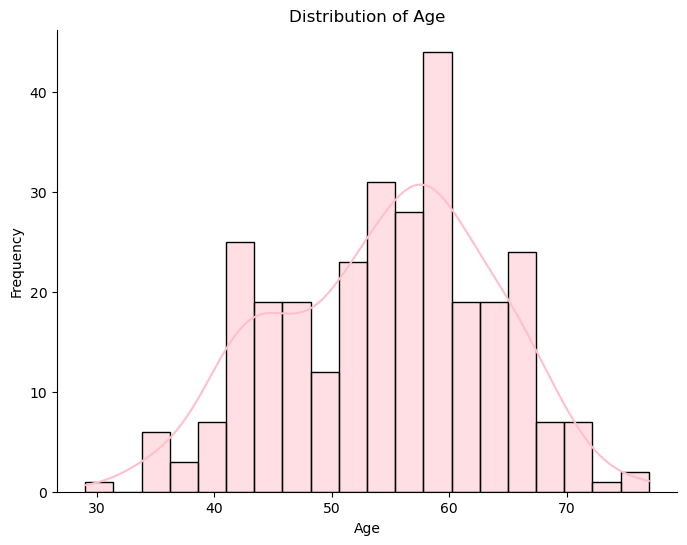

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(data=heart, x='age', bins=20, kde=True, color='pink')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
sns.despine()
plt.show()

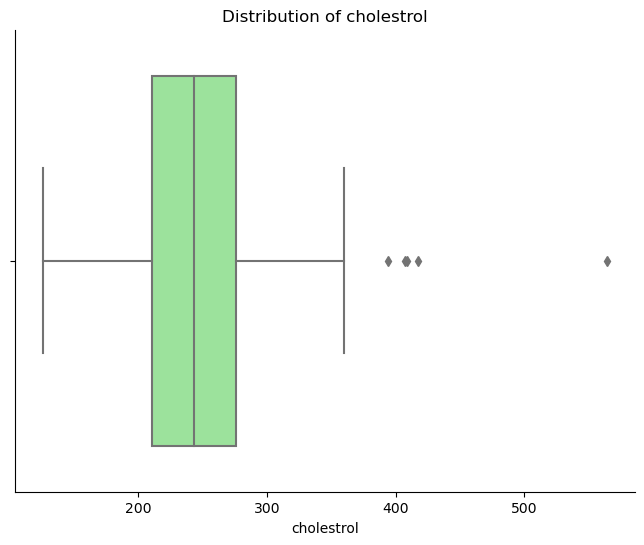

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=heart, x='chol', color='lightgreen')
plt.title('Distribution of cholestrol')
plt.xlabel('cholestrol')
sns.despine()
plt.show()

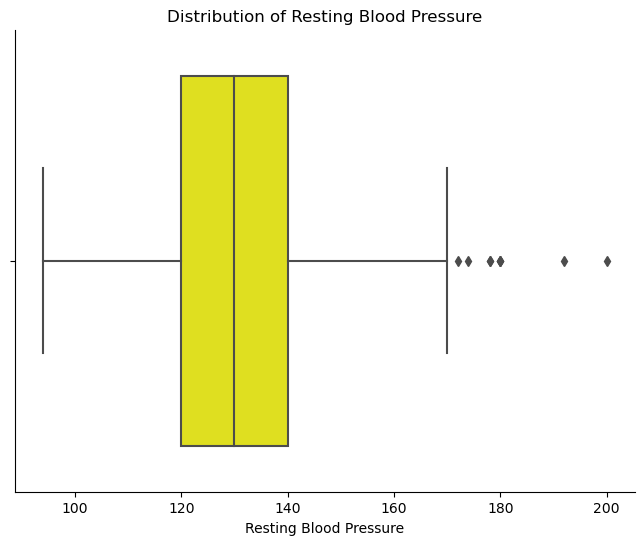

In [27]:
# Boxplot of trestbps (resting blood pressure)
plt.figure(figsize=(8, 6))
sns.boxplot(data=heart, x='trestbps', color='yellow')
plt.title('Distribution of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure')
sns.despine()
plt.show()

In [28]:
# Split the data
X = heart.drop(columns='present',axis=1)
y = heart['present']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = model.predict(X_train)

In [33]:
train_accuracy = accuracy_score(y_train, y_pred)

In [34]:
print(train_accuracy)

0.8481012658227848


In [35]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)
conf_matrix

array([[111,  13],
       [ 23,  90]])

In [36]:
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

In [37]:
print("Traning Sensitivity:", sensitivity)
print("Traning Specificity:", specificity)

Traning Sensitivity: 0.7964601769911505
Traning Specificity: 0.8951612903225806


In [38]:
# Extracting the coefficients from the logistic regression model
coefficients = model.coef_[0]
intercept = model.intercept_[0]

In [41]:
odds_ratios = np.exp(coefficients)

In [42]:
df_coefficients = pd.DataFrame({'Predictor': X_train.columns, 
                                 'Log-Odds Coefficients': coefficients,
                                 'Odds Ratios': odds_ratios}).sort_values(by = 'Log-Odds Coefficients',ascending=False)

In [43]:
df_coefficients

,Predictor,Log-Odds Coefficients,Odds Ratios
12,ca,1.097619,2.997021
2,sex,0.829067,2.291180
9,exang,0.701542,2.016861
10,oldpeak,0.346900,1.414675
13,thal,0.307885,1.360544
3,cp,0.266305,1.305133
7,restecg,0.137728,1.147663
11,slope,0.027733,1.028121
4,trestbps,0.017952,1.018114
5,chol,0.004632,1.004643


In [44]:
test_accuracy = model.score(X_test, y_test)

In [45]:
print(f'Traning Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Traning Accuracy: 0.8481012658227848
Test Accuracy: 0.8666666666666667
